# Analysis: Users

> To compare users, some features are derived and clustering is performed.

## Setup

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [41]:
path = "../data/cleaned/"

In [42]:
# Load cleaned minute data
minute = pd.read_csv(path + "minute_clean.csv").dropna()
minute = minute[minute.Calories > 0]
minute

,Id,ActivityMinute,Calories,Intensity,METs,Sleep,Steps
168,1503960366,2016-04-12 02:48:00,0.7865,0.0,10.0,3.0,0.0
169,1503960366,2016-04-12 02:48:00,0.7865,0.0,10.0,2.0,0.0
171,1503960366,2016-04-12 02:50:00,0.7865,0.0,10.0,1.0,0.0
172,1503960366,2016-04-12 02:50:00,0.7865,0.0,10.0,1.0,0.0
174,1503960366,2016-04-12 02:52:00,0.7865,0.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...
1304780,8792009665,2016-05-04 09:59:00,1.1727,0.0,10.0,1.0,0.0
1304781,8792009665,2016-05-04 10:00:00,1.1727,0.0,10.0,1.0,0.0
1304782,8792009665,2016-05-04 10:01:00,1.1727,0.0,10.0,1.0,0.0
1304783,8792009665,2016-05-04 10:02:00,1.1727,0.0,10.0,1.0,0.0


In [43]:
# Load weight data
weight = pd.read_csv(path + "weight_clean.csv")
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


## Create DataFrame

In [44]:
users = minute.groupby("Id").count().reset_index()
users.head()

,Id,ActivityMinute,Calories,Intensity,METs,Sleep,Steps
0,1503960366,9580,9580,9580,9580,9580,9580
1,1644430081,1384,1384,1384,1384,1384,1384
2,1844505072,2883,2883,2883,2883,2883,2883
3,1927972279,2065,2065,2065,2065,2065,2065
4,2026352035,14861,14861,14861,14861,14861,14861


In [45]:
users = users.loc[:, ["Id", "Calories"]]
users = users.rename({"Calories": "WornMinutes"}, axis=1)
users

,Id,WornMinutes
0,1503960366,9580
1,1644430081,1384
2,1844505072,2883
3,1927972279,2065
4,2026352035,14861
5,2320127002,69
6,2347167796,7318
7,3977333714,12912
8,4020332650,2875
9,4319703577,13042


In [46]:
avgs = minute.groupby("Id").mean().reset_index()

cols = avgs.columns.values

for i in range(len(cols)):
    if i == 0:
        continue

    cols[i] = "Avg" + cols[i]

avgs.columns = cols

avgs

,Id,AvgCalories,AvgIntensity,AvgMETs,AvgSleep,AvgSteps
0,1503960366,0.808439,0.014509,10.299374,1.067432,0.154906
1,1644430081,1.605129,0.061416,11.421965,1.247832,1.710260
2,1844505072,1.184960,0.117586,12.663892,1.426639,2.600763
3,1927972279,1.444053,0.005811,10.138499,1.054237,0.037288
4,2026352035,0.792233,0.010430,10.221048,1.063253,0.100801
5,2320127002,0.970667,0.028986,10.550725,1.173913,0.347826
6,2347167796,0.956654,0.006423,10.170675,1.094698,0.049877
7,3977333714,0.714352,0.007977,10.165815,1.371980,0.069160
8,4020332650,1.660622,0.083478,12.073739,1.107130,0.366957
9,4319703577,1.027562,0.008358,10.167459,1.056586,0.085723


In [47]:
users = pd.merge(users, avgs, how="left", on="Id")

In [48]:
# Add features indicating if used weight logging functionality
users["LoggedWeight"] = users.Id.isin(weight.Id.unique()).astype(int)

## KMeans Clustering

In [49]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [50]:
X = users.iloc[:, 1:]

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

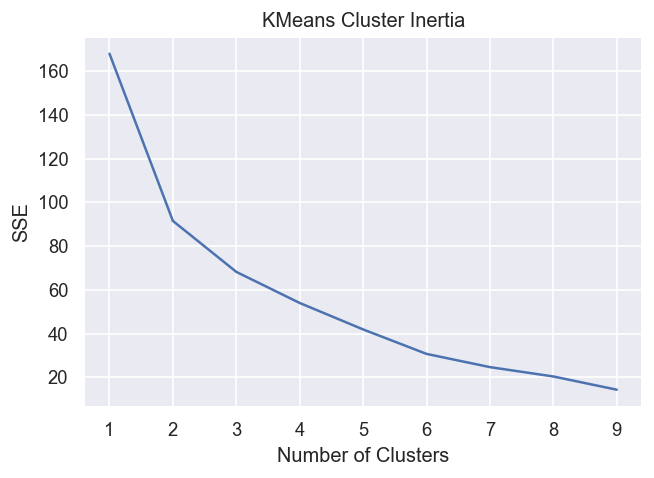

In [52]:
# Elbow method
ks = [i for i in range(1, 10)]
inertia = []

for k in ks:
    km = KMeans(k).fit(X)
    inertia.append(km.inertia_)

# Plotting
plt.figure(figsize=(6, 4), dpi=120)
plt.plot(ks, inertia)
plt.title("KMeans Cluster Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [63]:
k = 4
km = KMeans(k).fit(X)
labels = km.labels_

users["Cluster"] = labels
users

,Id,WornMinutes,AvgCalories,AvgIntensity,AvgMETs,AvgSleep,AvgSteps,LoggedWeight,Cluster
0,1503960366,9580,0.808439,0.014509,10.299374,1.067432,0.154906,1,3
1,1644430081,1384,1.605129,0.061416,11.421965,1.247832,1.710260,0,2
2,1844505072,2883,1.184960,0.117586,12.663892,1.426639,2.600763,0,1
3,1927972279,2065,1.444053,0.005811,10.138499,1.054237,0.037288,1,3
4,2026352035,14861,0.792233,0.010430,10.221048,1.063253,0.100801,0,0
5,2320127002,69,0.970667,0.028986,10.550725,1.173913,0.347826,0,0
6,2347167796,7318,0.956654,0.006423,10.170675,1.094698,0.049877,0,0
7,3977333714,12912,0.714352,0.007977,10.165815,1.371980,0.069160,0,0
8,4020332650,2875,1.660622,0.083478,12.073739,1.107130,0.366957,0,2
9,4319703577,13042,1.027562,0.008358,10.167459,1.056586,0.085723,1,3


## Vis

In [64]:
bar_avgs = users.groupby("Cluster").mean().iloc[:, 1:].reset_index()
bar_avgs

,Cluster,WornMinutes,AvgCalories,AvgIntensity,AvgMETs,AvgSleep,AvgSteps,LoggedWeight
0,0,8577.733333,1.130957,0.010339,10.259549,1.091576,0.117688,0.0
1,1,2883.000000,1.184960,0.117586,12.663892,1.426639,2.600763,0.0
2,2,2129.500000,1.632875,0.072447,11.747852,1.177481,1.038608,0.0
3,3,8622.333333,1.076616,0.010003,10.233277,1.067256,0.120563,1.0


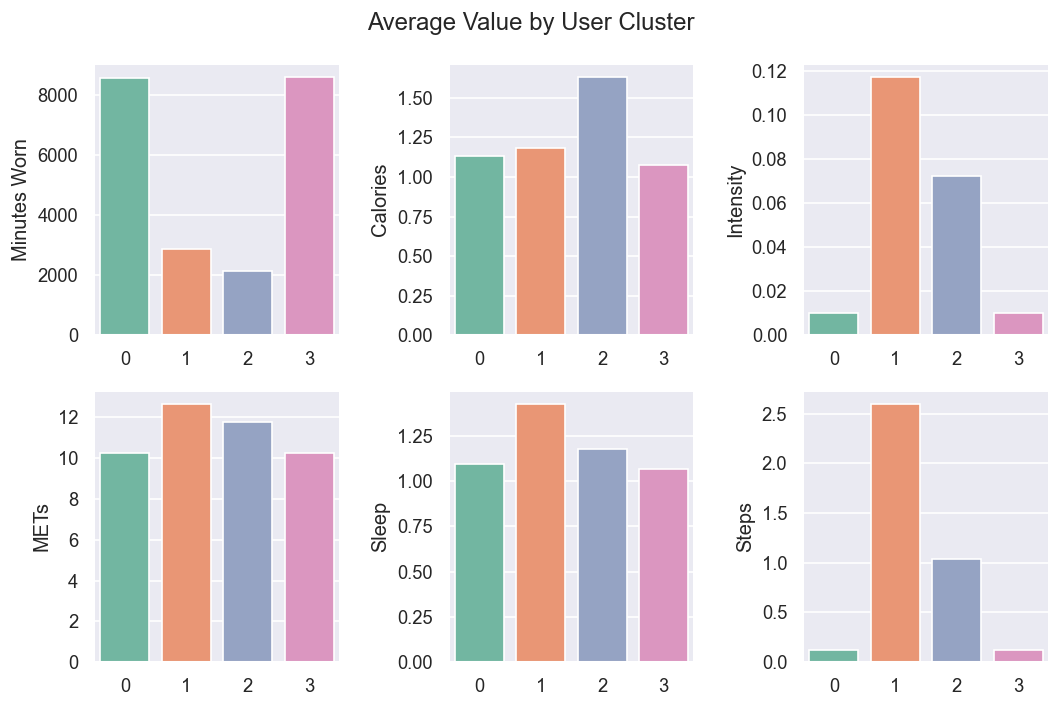

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6), dpi=120)

feats = users.columns[1:-1]
feats_names = ["Minutes Worn", "Calories", "Intensity", "METs", "Sleep", "Steps"]

for i, ax in enumerate(axes.reshape(-1)):
    sns.barplot(x=bar_avgs.Cluster, y=bar_avgs[feats[i]], ax=ax, palette="Set2")

    ax.set_ylabel(feats_names[i])
    ax.set_xlabel("")

plt.suptitle("Average Value by User Cluster")
plt.tight_layout()
plt.show()

## Write to CSV

In [56]:
users.to_csv(path + "users_clean.csv", index=False)